# Extracting Base Pair Step Parameters from 3DNA .out file
        

In [23]:
import pandas as pd
import shutil
import os
import random
import matplotlib.pyplot as plt
import csv

# Place all your 3dna.out files in a directory and provide below the full path of it
outfiles=os.listdir("/Users/ezgi/Software/NucDNADynamics/application_example/3dna_out")
os.chdir("/Users/ezgi/Software/NucDNADynamics/application_example/3dna_out")

for a in range(0,len(outfiles)):    
    if outfiles[a][-4:] == ".out":

        with open (outfiles[a], "r") as x3dna:
            parameters=x3dna.readlines()

        top=parameters.index("Local base-pair step parameters\n") + 2
        bottom=parameters.index("Local base-pair helical parameters\n") - 4

        with open (outfiles[a] +"_bps.csv", "a") as result:
            for i in range(top,bottom):
                
                for j in range(0,len(parameters[i].split()) - 1):
                    result.write(parameters[i].split()[j]+";")
                
                result.write(parameters[i].split()[j+1])
                result.write("\n")     


FileNotFoundError: [Errno 2] No such file or directory: '~/Software/NucDNADynamics/application_example/3dna_out'

# Extracting minor and major groove widths from 3DNA .out file

In [2]:
import pandas as pd
import shutil
import os
import random
import matplotlib.pyplot as plt
import csv

outfiles=os.listdir("/Users/ezgi/Software/NucDNADynamics/application_example/3dna_out")
os.chdir("/Users/ezgi/Software/NucDNADynamics/application_example/3dna_out")

for a in range(0,len(outfiles)):
    if outfiles[a][-4:] == ".out":
        with open (outfiles[a], "r") as x3dna:
            parameters=x3dna.readlines()

        top=parameters.index("                  Minor Groove        Major Groove\n") + 2
        bottom=parameters.index("Main chain and chi torsion angles: \n") - 4

        with open (outfiles[a] +"_groove_width.csv", "a") as result:
            for i in range(top,bottom):
                result.write(parameters[i].split()[0]+";"+parameters[i].split()[2]+";")
                result.write(parameters[i].split()[4])
                result.write("\n")     


# Merge the processed base pair step parameters

In [3]:
import pandas as pd
import shutil
import os
import random
import matplotlib.pyplot as plt
import csv

parsedfiles=os.listdir("YOUR_DIR/Software/NucDNADynamics/application_example/3dna_out")
os.chdir("YOUR_DIR/Software/NucDNADynamics/application_example/3dna_out")

for b in range(0,len(parsedfiles)):
    if parsedfiles[b][-8:] == "_bps.csv":
        with open (parsedfiles[b], "r") as results:
            all_parameters=results.readlines()

            for line in all_parameters:
                if not '---' in line:
                    with open ("bps_merged.csv", "a") as final:
                        final.write(line)

# Merge the processed groove widths

In [47]:
import pandas as pd
import shutil
import os
import random
import matplotlib.pyplot as plt
import csv

parsedfiles=os.listdir("/Users/ezgi/Software/NucDNADynamics/application_example/3dna_out")
os.chdir("/Users/ezgi/Software/NucDNADynamics/application_example/3dna_out")

for c in range(0,len(parsedfiles)):
    if parsedfiles[c][-10:] == "_width.csv":
        with open (parsedfiles[c], "r") as results:
            all_parameters=results.readlines()

            for line in all_parameters:
                if not '---' in line:
                    with open ("gw_merged.csv", "a") as final:
                        final.write(line)

# Find maximum, minimum and mean values of the merged base pair step parameters

In [5]:
import pandas as pd
import shutil
import os
import random
import csv
from statistics import mean

with open ("bps_max_min.csv", "a") as header:
    header.write('index;step;shift_max;shift_min;shift_mean;slide_max;slide_min;slide_mean;rise_max;rise_min;rise_mean;tilt_max;tilt_min;tilt_mean;roll_max;roll_min;roll_mean;twist_max;twist_min;twist_mean\n')
with open ("bps_merged.csv", "r") as basepair:
    parameters=basepair.readlines()
for i in range(1,145):
    shift=[]
    slide=[]
    rise=[]
    tilt=[]
    roll=[]
    twist=[]
    
    
    for j in range(1,len(parameters)):
        if parameters[j].split(';')[0] == str(i):
            step = parameters[i].split(';')[1]
            shift.append(float(parameters[j].split(';')[2]))
            slide.append(float(parameters[j].split(';')[3]))
            rise.append(float(parameters[j].split(';')[4]))
            tilt.append(float(parameters[j].split(';')[5]))
            roll.append(float(parameters[j].split(';')[6]))
            twist.append(float(parameters[j].split(';')[7]))
   
    with open ("bps_max_min.csv", "a") as max_min:
        max_min.write(str(i) + ';' + step + ';' + str(max(shift)) + ';' + str(min(shift)) + ';' + str(mean(shift)) + ';')
        max_min.write(str(max(slide)) + ';' + str(min(slide)) + ';' + str(mean(slide)) + ';')
        max_min.write(str(max(rise)) + ';' + str(min(rise)) + ';' + str(mean(rise)) + ';')
        max_min.write(str(max(tilt)) + ';' + str(min(tilt)) + ';' + str(mean(tilt)) + ';')
        max_min.write(str(max(roll)) + ';' + str(min(roll)) + ';' + str(mean(roll)) + ';')
        max_min.write(str(max(twist)) + ';' + str(min(twist)) + ';' + str(mean(twist)) + '\n')
               

# Plot mean value and variance of base pair parameters

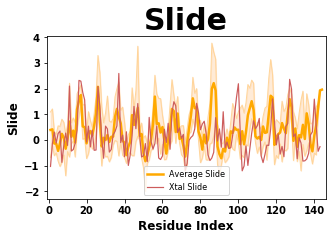

In [51]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import shutil
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

a=pd.read_csv(r"YOUR_PATH/NucDNADynamics/application_example/3dna_out/bps_max_min.csv", sep=";")
b=pd.read_csv(r"YOUR_PATH/NucDNADynamics/application_example/xtal/3lz0.out_bps.csv", sep=";") #xtal structure's base pair parameters

c=pd.DataFrame(a)
#Write the parameter you want to plot
max_c=c['slide_max']
min_c=c['slide_min']
index_c=c['index']

plt.figure(figsize=(5,3))

sns.lineplot(x="index", y="slide_max", linewidth=1, color='#ffd59a', data=a) #max
sns.lineplot(x="index", y="slide_min", linewidth=1, color='#ffd59a', data=a) #min
sns.lineplot(x="index", y="slide_mean", label='Average Slide', linewidth=2.5,color='#ffa900', data=a) #mean
sns.lineplot(x="index", y="slide", label='Xtal Slide', linewidth=1.2,color='#cd5c5c', data=b) #xtal
plt.fill_between(index_c,max_c,min_c, color='#ffbe7bff',alpha='0.3')

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.xlim(xmax = 146, xmin = -1)
plt.xlabel('Residue Index', fontsize=12, fontweight='bold')
plt.ylabel('Slide', fontsize=12, fontweight='bold')
plt.legend(fontsize=8, loc='lower center')
plt.title("Slide",fontsize=30, fontweight='bold')

plt.savefig("slide.png", dpi=600, bbox_inches = "tight",format="png")
plt.savefig("slide.pdf", dpi=600, bbox_inches = "tight",format="pdf")


# Find maximum, minimum and mean values of groove widhts 

In [48]:
import pandas as pd
import shutil
import os
import random
import csv
from statistics import mean

with open ("gw_max_min.csv", "a") as header:
    header.write('index;minor_max;minor_min;minor_mean;major_max;major_min;major_mean\n')

    with open ("gw_merged.csv", "r") as groove:
        parameters=groove.readlines()
for i in range(3,143):
    minor=[]
    major=[]

    for j in range(0,len(parameters)):
        if parameters[j].split(';')[0] == str(i):
            minor.append(float(parameters[j].split(';')[1]))
            major.append(float(parameters[j].split(';')[2]))
            
    with open ("gw_max_min.csv", "a") as max_min:
        max_min.write(str(i) + ';' + str(max(minor)) + ';' + str(min(minor)) + ';' + str(mean(minor)) + ';')
        max_min.write(str(max(major)) + ';' + str(min(major)) + ';' + str(mean(major)) + '\n')


# Plot mean value and variance of base pair parameters

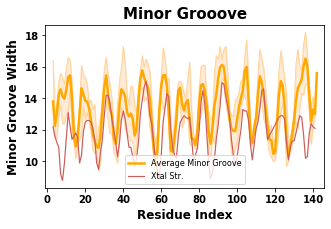

In [50]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import shutil
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import csv

a=pd.read_csv(r"/Users/ezgi/Software/NucDNADynamics/application_example/3dna_out/gw_max_min.csv", sep=";")
b=pd.read_csv(r"/Users/ezgi/Software/NucDNADynamics/application_example/xtal/3lz0.out_groove_width.csv", sep=";") #xtal structure's base pair parameters
c=pd.DataFrame(a)
#Write the parameter you want to plot
max_c=c['minor_max']
min_c=c['minor_min']
index_c=c['index']
minor_max_c=c['minor_max']

plt.figure(figsize=(5,3))

sns.lineplot(x="index", y="minor_max", linewidth=1, color='#ffd59a', data=a) #max
sns.lineplot(x="index", y="minor_min", linewidth=1, color='#ffd59a', data=a) #min
sns.lineplot(x="index", y="minor_mean", label='Average Minor Groove', linewidth=2.5,color='#ffa900', data=a) #mean
sns.lineplot(x="index", y="minor", label='Xtal Str.', linewidth=1.2,color='#cd5c5c', data=b) #xtal
plt.fill_between(index_c,max_c,min_c, color='#ffbe7bff',alpha='0.3')

plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.xlim(xmax = 146, xmin = -1)
plt.xlabel('Residue Index', fontsize=12, fontweight='bold')
plt.ylabel('Minor Groove Width', fontsize=12, fontweight='bold')
plt.legend(fontsize=8, loc='lower center')
plt.title("Minor Grooove",fontsize=15, fontweight='bold')

plt.savefig("minor_groove.png", dpi=600, bbox_inches = "tight",format="png")
plt.savefig("minor_groove.pdf", dpi=600, bbox_inches = "tight",format="pdf")
